<a href="https://colab.research.google.com/github/nml5374/FinalProj/blob/main/DS440_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Training_Set.zip

!unzip gdrive/My\ Drive/Validation_Set.zip

# !unzip gdrive/MyDrive/Mask_Training.zip

# !unzip gdrive/MyDrive/NoMask_Training.zip

# !unzip gdrive/MyDrive/valid.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training_Set/NoMask_Training/000412.jpg  
  inflating: Training_Set/NoMask_Training/000413.jpg  
  inflating: Training_Set/NoMask_Training/000414.jpg  
  inflating: Training_Set/NoMask_Training/000415.jpg  
  inflating: Training_Set/NoMask_Training/000416.jpg  
  inflating: Training_Set/NoMask_Training/000417.jpg  
  inflating: Training_Set/NoMask_Training/000418.jpg  
  inflating: Training_Set/NoMask_Training/000419.jpg  
  inflating: Training_Set/NoMask_Training/000420.jpg  
  inflating: Training_Set/NoMask_Training/000421.jpg  
  inflating: Training_Set/NoMask_Training/000422.jpg  
  inflating: Training_Set/NoMask_Training/000423.jpg  
  inflating: Training_Set/NoMask_Training/000424.jpg  
  inflating: Training_Set/NoMask_Training/000425.jpg  
  inflating: Training_Set/NoMask_Training/000426.jpg  
  inflating: Training_Set/NoMask_Training/000427.jpg  
  inflating: Training_Set/NoMask_Training/000428.jpg  
  inflating: T

In [ ]:
# Directory with our training mask pictures
train_mask_dir = os.path.join('Training_Set/Mask_Training')

# Directory with our training no mask pictures
train_no_mask_dir = os.path.join('Training_Set/NoMask_Training')

# Directory with our testing mask pictures
#test_mask_dir = os.path.join('Mask_Testing')

# Directory with our testing no mask pictures
#test_no_mask_dir = os.path.join('NoMask_Testing')

# Directory with our validation mask pictures
valid_mask_dir = os.path.join('Validation_Set/Mask_Validation')

# Directory with our validation no mask pictures
valid_no_mask_dir = os.path.join('Validation_Set/NoMask_Validation')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_no_mask_names = os.listdir(train_no_mask_dir)
print(train_no_mask_names[:10])

#test_mask_names = os.listdir(test_mask_dir)
#print(test_mask_names[:10])

#test_no_mask_names = os.listdir(test_no_mask_dir)
#print(test_no_mask_names[:10])

validation_mask_hames = os.listdir(valid_mask_dir)
print(validation_mask_hames[:10])

validation_no_mask_names = os.listdir(valid_no_mask_dir)
print(validation_no_mask_names[:10])

['01390_Mask.jpg', '01378_Mask.jpg', '1_0_2020-02-24 224914.png', '00901_Mask.jpg', '0_0_1 copy 14.jpg', '0_0_0 copy 38.jpg', '00806_Mask.jpg', '1_0_18.jpg', '01154_Mask.jpg', '00267_Mask.jpg']
['386.jpg', '000186.jpg', 'TD2.jpg', '0_0_yangmi_0018.jpg', '000401.jpg', 'TD_RGB_E3.jpg', '000849.jpg', '082_a.png', '0_0_sunyizhou_0048.jpg', '001360.jpg']
['02577_Mask.jpg', '02259_Mask.jpg', '02401_Mask.jpg', '02484_Mask.jpg', '02856_Mask.jpg', '02130_Mask.jpg', '02927_Mask.jpg', '02472_Mask.jpg', '02456_Mask.jpg', '02726_Mask.jpg']
['001748.jpg', '001680.jpg', '002278.jpg', '001835.jpg', '001706.jpg', '002498.jpg', '001557.jpg', '002275.jpg', '001683.jpg', '002386.jpg']


In [ ]:
print('total training mask images:', len(os.listdir(train_mask_dir)))
print('total training no mask images:', len(os.listdir(train_no_mask_dir)))
#print('total testing mask images:', len(os.listdir(test_mask_dir)))
#print('total testing no mask images:', len(os.listdir(test_no_mask_dir)))
print('total validation mask images:', len(os.listdir(valid_mask_dir)))
print('total validation no mask images:', len(os.listdir(valid_no_mask_dir)))

total training mask images: 4000
total training no mask images: 4000
total validation mask images: 1000
total validation no mask images: 1000


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

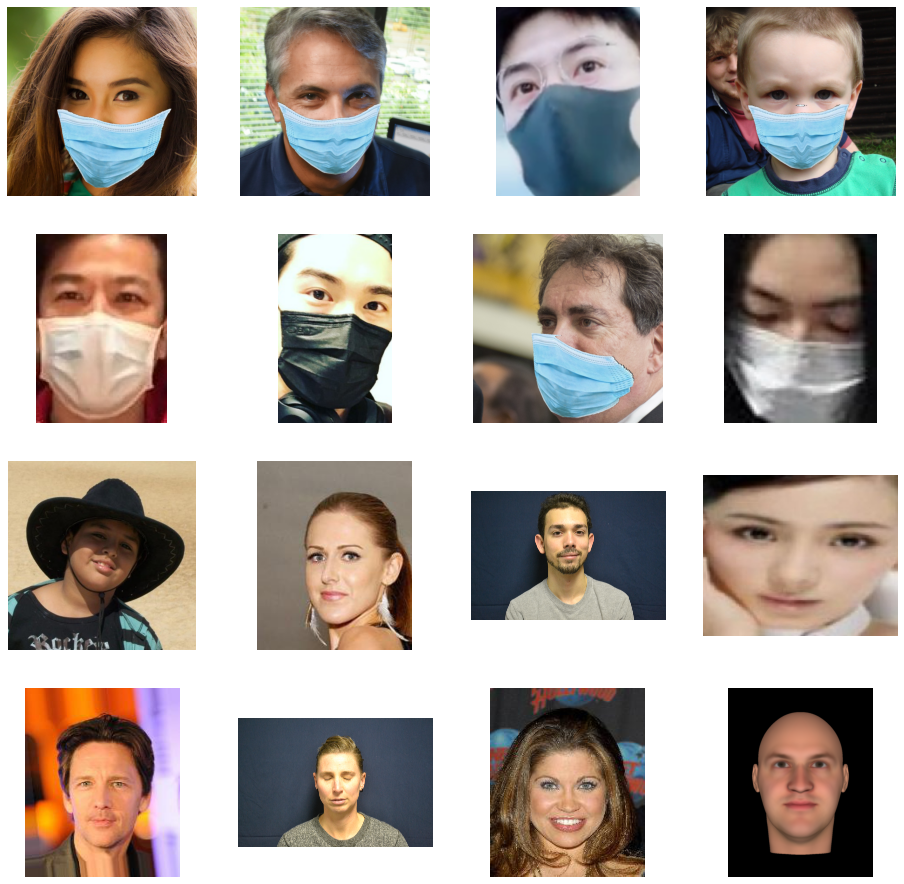

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_mask_pic = [os.path.join(train_mask_dir, fname) 
                for fname in train_mask_names[pic_index-8:pic_index]]
next_no_mask_pic = [os.path.join(train_no_mask_dir, fname) 
                for fname in train_no_mask_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mask_pic + next_no_mask_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training_Set',  # This is the source directory for training images
        classes = ['Mask_Training', 'NoMask_Training'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=999,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Validation_Set',  # This is the source directory for training images
        classes = ['Mask_Validation', 'NoMask_Validation'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=250,
        # Use binary labels
        class_mode='binary',
        shuffle=False)



Found 7997 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 128)               15360128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  
#       epochs=15,
#       verbose=1,
#       validation_data = validation_generator,
#       validation_steps=8)

history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
5/8 [=================>............] - ETA: 35s - loss: 51.5094 - accuracy: 0.4791

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


8/8 [==============================] - 115s 15s/step - loss: 40.8521 - accuracy: 0.4921 - val_loss: 14.4948 - val_accuracy: 0.5050
Epoch 2/15
8/8 [==============================] - 122s 16s/step - loss: 6.1765 - accuracy: 0.5753 - val_loss: 3.0750 - val_accuracy: 0.5940
Epoch 3/15
8/8 [==============================] - 110s 14s/step - loss: 2.7587 - accuracy: 0.6670 - val_loss: 0.7998 - val_accuracy: 0.8190
Epoch 4/15
8/8 [==============================] - 110s 16s/step - loss: 2.1728 - accuracy: 0.7235 - val_loss: 0.2413 - val_accuracy: 0.9345
Epoch 5/15
8/8 [==============================] - 110s 14s/step - loss: 1.6367 - accuracy: 0.7818 - val_loss: 0.3029 - val_accuracy: 0.9280
Epoch 6/15
8/8 [==============================] - 110s 14s/step - loss: 0.9742 - accuracy: 0.8444 - val_loss: 0.1357 - val_accuracy: 0.9615
Epoch 7/15
8/8 [==============================] - 109s 14s/step - loss: 0.5222 - accuracy: 0.8978 - val_loss: 0.0351 - val_accuracy: 0.9900
Epoch 8/15
8/8 [=============

In [ ]:
print(model.metrics_names)


['loss', 'accuracy']


In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 21s 2s/step - loss: 0.2302 - accuracy: 0.9220


[0.23015670478343964, 0.921999990940094]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 21s 2s/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

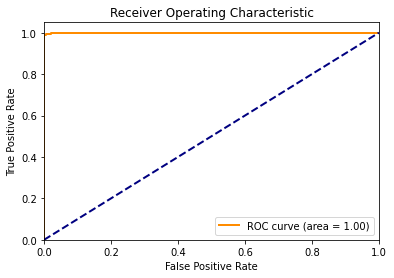

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Roc curve area = 0.95
# NEW auc = 1.00

Saving 0129.png to 0129.png
[0.50163704]
0129.png is no mask


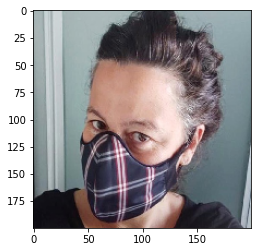

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is a mask")
  else:
    print(fn + " is no mask")

**Clean Up**
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)